## __CONFIGURATIONAL MODEL__

In [8]:
import random
from random import *
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from math import log
from math import exp
from math import sqrt
from math import cosh
from math import tanh
import networkx as nx
import sys
import copy
from statistics import mean
from numpy.linalg import inv
from ipywidgets import FloatProgress
from IPython.display import display
import pylab as pl

import random
from random import *
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from math import log
from math import exp
from math import cosh
from math import tanh
import random
import matplotlib.pyplot as plt
import networkx as nx
import copy
from statistics import mean
from numpy.linalg import inv

from ipywidgets import FloatProgress
from IPython.display import display
import pylab as pl

### PROBLEM 1. GRAPH GENERATION

We are going to study the properties of the configurational model for a random graph with a given degree distribution: 
\begin{equation}
p_1=1-\pi\, , p_4=\pi \,.
\end{equation}

To generate this graph we create the list of stubs corresponding to a given degree distribution. Afterwards one by one we connect randomly two nodes according to the number of available stubs they have. We put a condition to avoid self-edges and double connections in a graph.  


In [9]:
def graph_generator(nodes,p):
    if nodes*(3*p+1)%2==0:
        run=1
        while run:
            connections=[4]*int(round(p*nodes)) + [1]*int(round((1-p)*nodes))
            random.shuffle(connections)
            data = {k: [] for k in range(nodes)}
            for i in range(nodes):
                k=0
                run=0
                while len(data[i])<connections[i]:
                    temp_node=random.randint(0, nodes-1)
                    while len(data[temp_node])==connections[temp_node] or temp_node==i or (i in data[temp_node]):
                        temp_node=random.randint(0, nodes-1)
                        if k>20:
                            run=1
                            #while len(data[temp_node])==connections[temp_node]:
                                #temp_node=random.randint(0, nodes-1)
                            break
                        k+=1
                    data[i].append(temp_node)
                    data[temp_node].append(i)
                if run==1:
                    break
        return data
    else:
        raise ValueError('CHANGE p')

In [10]:
def generate_edges_ising(graph):
    edges = []
    for node in range(nodes):
        for neighbour in graph[node]:
            edges.append((node, neighbour))
    return edges

def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))
    return edges

def draw_graph_ising(graph,position):
    color_map = []
    for i in graph['spin']:
        if i==1:
            color_map.append('r')
        else: color_map.append('g') 
    G = nx.Graph()
    G.add_edges_from(generate_edges_ising(graph))
    nx.draw_networkx(G,pos=position,nodelist=range(nodes),with_labels=True,node_color=color_map)
    plt.title('GRAPH OF SIZE N=%.2d' %len(graph['spin']))
    plt.show()
    return

def draw_graph(graph,position):
    G = nx.Graph()
    G.add_edges_from(generate_edges(graph))
    nx.draw_networkx(G,pos=position)
    plt.title('GRAPH OF SIZE N=%.2d' %len(graph))
    plt.show()
    return


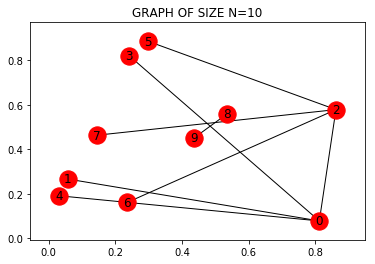

{0: [4, 3, 1, 2], 1: [0], 2: [0, 6, 5, 7], 3: [0], 4: [0], 5: [2], 6: [2], 7: [2], 8: [9], 9: [8]}


In [11]:
nodes=10 #number of nodes
p=0.2 #fraction_of_vx_with_degree_4
q=1-p  #fraction_of_vx_with_degree_1    


position={x: [np.random.random(),np.random.random()] for x in range(nodes)}
graph=graph_generator(nodes,p)
draw_graph(graph,position)
print(graph)


### PROBLEM 2.GIANT COMPONENT EMERGENCE

__A.__ To calculate the giant component emergence analytically let's consider $\eta$ to be the probability that randomly taken __edge__ does not belong to the giant component:
\begin{equation}
\eta=q_1+q_4 \eta^4\,,
\end{equation}
where $q_1=\frac{1-\pi}{1+3\pi}$ and $q_4=\frac{4\pi}{1+3\pi}$ probability distribution of edges.

Now let's call $1-\gamma$ the probabillity that randomly taken __vertex__ does not belong to a giant component. Then the equation for this can be written as following:
\begin{equation}
1-\gamma= (1-\pi)\eta+\pi \eta^4 .
\end{equation}

Solving these two equations we find the critical value of $\pi_{cr}=\frac{1}{9}$, when the giant component appears.
The probability that randomly taken vertex belongs to a giant component then reads:

\begin{equation}
\gamma(\pi)=1-(1-\pi)\frac{1-\sqrt\pi}{2\sqrt\pi} - \pi  \left( \frac{1 - \sqrt\pi }{2 \sqrt\pi} \right)^4\,.
\end{equation}


__B.__ Now we want to compare our analytical calculations with numerics. Below we write the algorithm to determine the size of the largest connected component for a given graph at different value of $\pi$. In this algorythm we start from some node in a graph and visit all the neighbours of this point counting the size of the connected component, at the end we take the largest of the visited components. 

In [12]:
def DFS(graph,starting_point,all_visited,visited):
    all_visited.append(starting_point)
    visited.append(starting_point)
    for edge in graph[starting_point]:
        if edge not in visited:
            DFS(graph,edge,all_visited,visited)
    return
        
                 
def giant_detector(graph,nodes):
    maximum=0.;
    all_visited=[]
    for i in range(nodes):
        if i not in all_visited:
            visited=[]
            DFS(graph,i,all_visited,visited)
            if len(visited)>maximum:
                maximum=len(visited)
    return maximum/nodes  

In [13]:
def graph_generator_fast(nodes,p):
    if nodes*(3*p+1)%2==0:
        run=1
        while run:
            connections=[4]*int(round(p*nodes)) + [1]*int(round((1-p)*nodes))
            random.shuffle(connections)
            data = {k: [] for k in range(nodes)}
            for i in range(nodes):
                k=0
                run=0
                while len(data[i])<connections[i]:
                    temp_node=random.randint(0, nodes-1)
                    if nodes < 100:
                        while len(data[temp_node])==connections[temp_node] or temp_node==i or (i in data[temp_node]):
                            temp_node=random.randint(0, nodes-1)
                            if k>50:
                                run=1
                                break
                            k+=1
                    else:
                        while len(data[temp_node])==connections[temp_node] or temp_node==i or (i in data[temp_node]):
                            temp_node=random.randint(0, nodes-1)
                            if k>50:
                                while len(data[temp_node])==connections[temp_node]:
                                    temp_node=random.randint(0, nodes-1)   
                                break     
                            k+=1
                        else:
                            while len(data[temp_node])==connections[temp_node]:
                                temp_node=random.randint(0, nodes-1)                        
                    data[i].append(temp_node)
                    data[temp_node].append(i)
                if run==1:
                    break
        return data
    else:
        raise ValueError('CHANGE p')

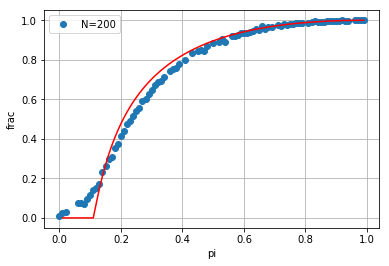

In [7]:
trials=30
def stats_giant(nodes,p):
    sigma=0.
    for i in range(trials):
        graph=graph_generator_fast(nodes,p)
        sigma+=giant_detector(graph,nodes)
    return sigma/trials
def q_core_prediction(t):
    if t>0.11:
        return 1-(1-t)*(1-sqrt(t))/(2*sqrt(t)) - t*((1 -sqrt(t))/(2*sqrt(t)))**4
    else:
        return 0

list_values=[]
arg_values=[]

for i in range(1,100):
    arg_values.append(i/100.)
    list_values.append(q_core_prediction(i/100.))


list_nodes={200}
f=FloatProgress(min=0,max=1)
display(f)  
for nodes in list_nodes:
    p_list=[]
    for i in range(100):
        p=i/100
        if nodes*(3*p+1)%2==0:
            p_list.append(p)       
    sigma_list=[]
    for p in p_list:
        sigma_list.append(stats_giant(nodes,p))
        f.value += (1./(len(p_list)))
plt.plot(p_list,sigma_list, 'o', label='N=%.2d' %nodes)
plt.grid( )    
plt.plot(arg_values,list_values, 'r')    
plt.xlabel('pi')
plt.ylabel('frac')
plt.legend()
plt.show()

As we can see for $N=200$ two solutions match. The difference between numerical and analytical solution at small values of $\pi$ can be explained with the finite size effect. In reality graph will always have some fraction of vertexes in a giant component for any $\pi$ value, in analytics though when $\pi \rightarrow 0$ solution diverges to minus infinity. 

### PROBLEM 3.THE 3-CORE

__A.__ To generate a 3-core, we are going to use an algorithm, at each step of which we will check the degree of all vertexes and remove them and its edges if $\deg<3$, doing this we effectively lower the degree of the neighbours. The remaining graph we are left with is called 3-core. It consists of the nodes with degree equal or larger than 3.

For analytics one can write the system of nonlinear equations for the time evolution of the degree distribution $p_d(t)$, in our case $d=0,1,2,3,4$. 


The first term on the rhs describes the removed vertex. It appears only in the equations
for $p_d$ with $d < 3$, because no vertex of higher current degree is ever removed.
The second contribution results from the neighbours of the removed vertex. Their degree
decreases by one.

\begin{equation}
\frac{d}{dt}\{(1-t)p_d(t)\}=-\frac{\chi_dp_d(t)}{\bar\chi(t)}+\frac{\bar{d\chi}(t)}{\bar\chi(t)}\left[-\frac{dp_d(t)}{c(t)}+\frac{(d+1)p_{d+1}(t)}{c(t)} \right]\,,
\end{equation}

where $\chi_d$ is just an indicator for vertexes of the degree at most $q-1$, so $\chi_0=\chi_1=\chi_2=1$ and $\chi_3=\chi_4=0$ and we define functions $\bar\chi(t),\bar{d\chi}(t),c(t) $ as following


\begin{equation}
\begin{split}
\bar\chi(t)&=&\sum_d\chi_dp_d(t),\\
\bar{d\chi}(t)&=&\sum_d d\chi_dp_d(t)\\
c(t)&=&\sum_ddp_d(t)
\end{split}
\end{equation}

As a result we have a system of 5 equations with initial conditions $p_0(0)=p_2(0)=p_3(0)=0$ and $p_1(0)=1-\pi, p_4(0)=\pi$, which can be solved numerically in Mathematica. Changing the value of the $\pi$ we observe different behaviour of the degree distribution. 


__BEFORE PHASE TRANSITION__<img src="q_core_pi3.png" width="350"> 
__AFTER PHASE TRANSITION__<img src="q_core_after_trans1.png" width="350">

As can be seen from the figures above $p_{cr}\approx 0.667$, when $p<p_{cr}$ within the time all five $p_d(t)$ are going to zero. Instead when $p>p_{cr}$ there is a time when the fraction of vertexes with $\deg <3$ is going to zero, while fraction of vertexes with $\deg>3$ is going to finite value.  

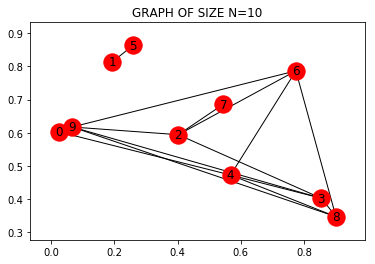

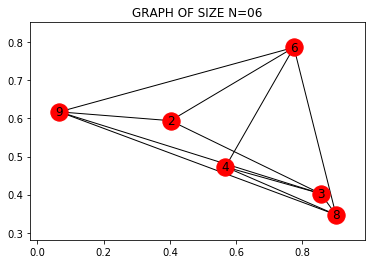

In [14]:
nodes=10
p=0.6
graph=graph_generator(nodes,p)
position={x: [np.random.random(),np.random.random()] for x in range(len(graph))}
draw_graph(graph,position)

def q_core_generator(graph):#function which gives 3-core graph
    deleted=1
    while deleted:
        deleted=0
        for edge in list(graph):
            if len(graph[edge])<3:
                for node in graph:
                    for con in graph[node]:
                        if con==edge:
                            graph[node].remove(con)
                del graph[edge]
                deleted=1
    return graph  

draw_graph(q_core_generator(graph),position)


In [15]:
def q_core_generator(graph): #a function which returns a fraction of vx inside a 3 core
    norm=len(graph)
    deleted=1
    while deleted:
        deleted=0
        for edge in list(graph):
            if len(graph[edge])<3:
                for node in graph:
                    for con in graph[node]:
                        if con==edge:
                            graph[node].remove(con)
                del graph[edge]
                deleted=1
    if len(graph)>0:
        return len(graph)/norm
    else:
        return 0

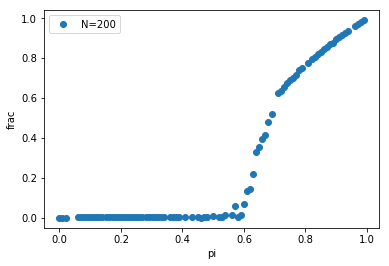

In [20]:
trials=30
def stats_core(nodes,p):
    sigma=0
    for i in range(trials):
        graph=graph_generator_fast(nodes,p)
        sigma+=q_core_generator(graph)
    return sigma/trials

list_nodes=[200]
f=FloatProgress(min=0,max=1)
display(f)  
for nodes in list_nodes:
    s=0
    p_list=[]
    for i in range(100):
        p=i/100.
        s=nodes*(3*p+1)
        if s %2==0:
            p_list.append(p)
    sigma_list=[]
    for p in p_list:
        sigma_list.append(stats_core(nodes,p)) 
        f.value += (1./(len(p_list)))
plt.plot(p_list,sigma_list, 'o', label='N=%.2d' %nodes)   
plt.xlabel('pi')
plt.ylabel('frac')
plt.legend()
plt.show()



As we can see from the plot above the critical value of $\pi$ we have got with numerics is around $0.67$. This has been predicted by our analytical computations done in Mathematica.

### PROBLEM 4. ISING MODEL

To study Ising model on a graph we generate a graph attaching to each vertex a spin with randomly taken value $+1$ or $-1$. Given a Hamiltonian 
\begin{equation}
H=-\sum_{\{i,j\}\in E}S_iS_j\,.
\end{equation}

We model it with Monte Carlo algorythm, where we select randomly the spin, flip it and calculate the difference of energy of the system before and after the flip. If the energy is negative we accept the move and if it's positive we accept it with certain probability given by $e^{-\beta \Delta E}\,.$ At high temperature we expect to have paramagnetic state with zero magnetization and at low temperature feromagnetic state with average magnetization 1. 

In [11]:
def graph_generator_ising(nodes,p):
    graph=graph_generator(nodes,p)
    graph.update({'spin': list(np.random.choice([-1, 1]) for x in range(nodes))})
    return graph

In [12]:
def get_spin(graph,node):
    spin=graph['spin'][node]
    return spin

def flip_spin(node):
    graph['spin'][node]=-graph['spin'][node]
    return

def ising_model(graph,T):
    beta=1/T
    for i in range(1000):
        flip=np.random.randint(0,nodes)
        neighbors=graph[flip]
        E_i=0
        E_f=0
        for neigh in neighbors:
            E_i=E_i-get_spin(graph,flip)*get_spin(graph,neigh)
            E_f=E_f+get_spin(graph,flip)*get_spin(graph,neigh)
        delta_E=E_f-E_i
        if delta_E<0:
            flip_spin(flip)
        else:
            if np.random.random()<exp(-delta_E*beta):
                flip_spin(flip) 
    return


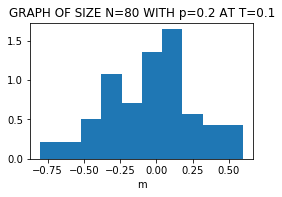

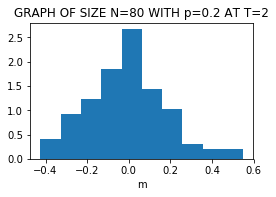

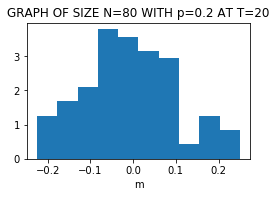

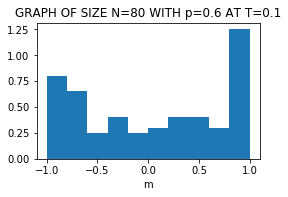

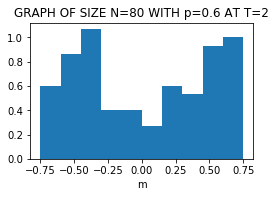

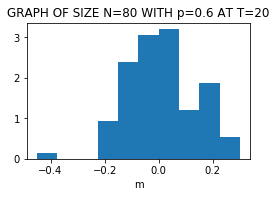

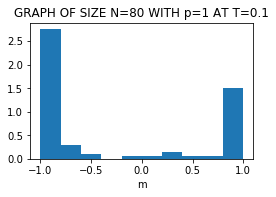

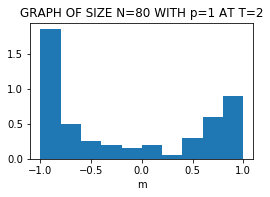

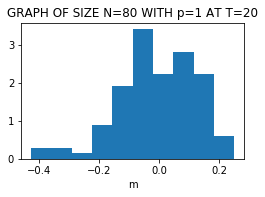

In [13]:
nodes=80
p_list=[0.2, 0.6,1]
temp_list=[0.1,2,20]
for p in p_list:
    for T in temp_list:
        magnetization=[]
        for i in range(100):
            graph=graph_generator_ising(nodes,p)
            ising_model(graph,T)
            magnetization.append(np.mean(graph['spin']))
        plt.figure(figsize=(4,2.5))     
        plt.hist(magnetization,bins=10,normed=True)
        plt.title('GRAPH OF SIZE N='+str(nodes)+ ' WITH p='+str(p)+' AT T='+str(T))
        plt.xlabel('m')
        #plt.ylabel('proba')
        plt.show()


__A. MONTE CARLO__ 

We plot the histograms of the magnetization for different values of $\pi$ and different temperatures. As can be seen from the plots, when $\pi=0.2$ meaning graph with low connectivity, the system doesn't behave as a feromagnet even at low temperature, intuitively it can be seen as if system was very disconnected, some parts of the system are not talking to each other, so starting from some initial configuration system cannot reach the state with some finite value of magnetization.

On the other hand, for the graph with $\pi$ big enough, meaning highly connected graph, system indeed goes to feromagnetic phase at low T and to paramagnetic phase at hight T. Thus we can find the phase transition temperature $T_{cr}$ as a temperature at which two peaks appear on the histogram. 


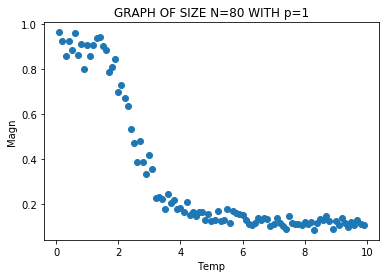

In [82]:
nodes=80
p=1
stat=30
magnetization=[]
for i in range(stat):
    graph=graph_generator_ising(nodes,p)
    temperature=[]
    temp_magnetization=[]
    temp_graph=copy.deepcopy(graph)
    for i in range(1,100):
        graph=copy.deepcopy(temp_graph)
        ising_model(graph,i/10)
        temperature.append(i/10)
        temp_magnetization.append(abs(np.mean(graph['spin'])))
    magnetization.append(temp_magnetization)
magnetiz_average=list(map(mean, zip(*magnetization)))    
   
plt.plot(temperature,magnetiz_average,'o')
plt.xlabel('Temp')
plt.ylabel('Magn')
plt.title('GRAPH OF SIZE N='+str(nodes)+ ' WITH p='+str(p))
plt.show()    


__B. BELIEF PROPAGATION__

Another approach to the Ising model on a random graph is 
to introduce cavity fields 
\begin{equation}
h_{j|i}=\frac{1}{2\beta}\sum_{k \in N(j) \backslash i}\ln\frac{\cosh\beta(h_{k|j}+1)}{\cosh\beta(h_{k|j}-1)}\,,
\end{equation}
as the messages coming to $j$ vertex from all it's neighbours besides $i$. 

Then for each vertex we introduce an effective field 
\begin{equation}
h_i=\frac{1}{2\beta}\sum_{j \in N(j)}\ln\frac{\cosh\beta(h_{j|i}+1)}{\cosh\beta(h_{j|i}-1)}\,.
\end{equation}

These local fields are related to marginal probabilities $p(\sigma_i)$ probability for the single spin have the value $\sigma_i$. Then the local magnetization can be computed using the formula $m_i=\tanh \beta h_i$.



In [83]:
def node_removal(orig_graph,n):
    graph=copy.deepcopy(orig_graph)
    for node in graph:
        for con in graph[node]:
            if con==n:
                graph[node].remove(con)
    del graph[n]
    return graph


In [84]:
def h_propagation(graph,node,h,beta):
    if len(graph[node])==0:
        return h[node]
    h_new=0
    for edge in graph[node]:
        h_neigh=h_propagation(node_removal(graph,node),edge,h,beta)
        h_new=h_new + 1/(2*beta)*log(cosh(beta*(h_neigh+1)) / cosh(beta*(h_neigh-1)))  
    h[node]=h_new
    return h[node]

def h_propagation_new(graph,node,h,beta):
    h_new=0
    for edge in graph[node]:
        h_neigh=h[edge]
        h_new=h_new + 1/(2*beta)*log(cosh(beta*(h_neigh+1)) / cosh(beta*(h_neigh-1)))  
    h[node]=h_new
    return h[node]


def belief_propagation(graph,T,N):
    beta=1/T
    h=[np.random.random() for x in range(nodes)]
    m=list(range(N))
    x=list(range(N))
    for i in range(N):
        node=np.random.randint(nodes)
        h_propagation_new(graph,node,h,beta)
        M=0
        for mag in range(nodes):
            M=M+tanh(beta*h[mag])
        m[i]=M/nodes
   # plt.plot(x,m)
   # plt.show()    
    return (m[N-1])
    
nodes=100
p=0.2
T=0.2
graph=graph_generator_ising(nodes,p)
print('At T =',T, ', m =',belief_propagation(graph,T,1000))
    

('At T =', 0.2, ', m =', 0.9385488999881957)


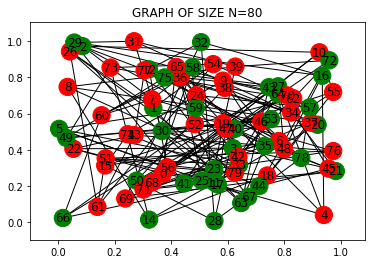

FloatProgress(value=0.0)

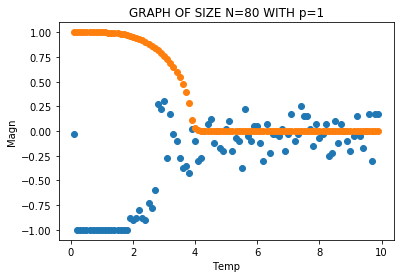

In [85]:
nodes=80
p=1
stat=1

position={x: [np.random.random(),np.random.random()] for x in range(nodes)}
graph=graph_generator_ising(nodes,p)
draw_graph_ising(graph,position)

def monte_carlo(graph,stat,T):
    m=[]
    for i in range(stat):
        temp_graph=copy.deepcopy(graph)
        ising_model(graph,T)
        m.append(np.mean(graph['spin']))
        graph=copy.deepcopy(temp_graph)
    return np.mean(m)


magnetization=[]
magnetization_bf=[]
temp=[]
f=FloatProgress(min=0,max=100)
display(f)
for i in range(1,100):
    magnetization.append(monte_carlo(graph,stat,i/10))
    magnetization_bf.append(belief_propagation(graph,i/10,5000))
    temp.append(i/10)
    f.value += 1    
plt.plot(temp,magnetization,'o')
plt.plot(temp,magnetization_bf,'o')
plt.xlabel('Temp')
plt.ylabel('Magn')
plt.title('GRAPH OF SIZE N='+str(nodes)+ ' WITH p='+str(p))
plt.show() 


Here we compare two approaches to Ising model: BP (yellow points) and MC simulation (blue points). From BP we can get $T_{cr}$ very precisely, since it is the temperature at which fields become nonzero. From the plot we see that in case $\pi=1$ $T_{cr}=4$, it is consistent also with MC simulation.

__C. POPULATION DYNAMICS__ 

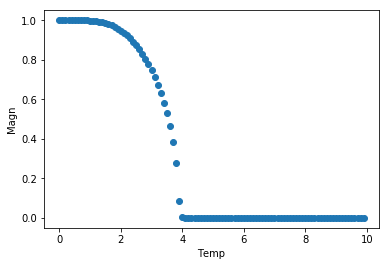

In [86]:
nodes=20
p=1

h=[(1-0.01)*np.random.random()+0.01 for x in range(nodes)]
ds=[]
run=1
mean=[]
rms=[]
x_plot=[]
y_plot=[]

for T in range(100):
    beta=1/((T+0.1)/10)
    temp_h=list(h)
    run=1
    while run:
        ds=[]
        if np.random.random()<(4*p)/(1+3*p):
            d=4
        else:
            d=1
        for i in range(d):
            ds.append(random.randint(0,nodes-1))  
        for i in range(nodes):
            temp_lis=0
            for l in ds:
                temp_lis=temp_lis + 1/(2*beta)*log(cosh(beta*(h[l]+1))/cosh(beta*(h[l] - 1)))
            h[i]=temp_lis
        mean=np.mean(h)
        rms=np.std(h)
        if rms < 0.0001:
            run=0
    x_plot.append(T/10)
    y_plot.append(np.mean(h)/d)
    h=temp_h
plt.plot(x_plot,y_plot,'o')
plt.xlabel('Temp')
plt.ylabel('Magn')
plt.show()

### PROBLEM 5. INVERSE ISING MODEL 

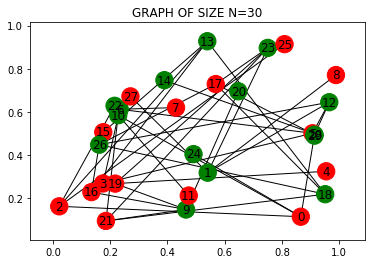

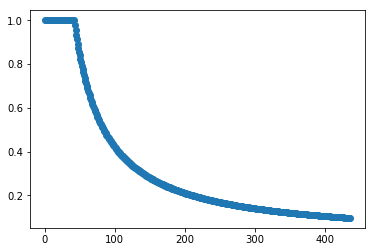

In [73]:
def get_spin(graph,node):
    spin=graph['spin'][node]
    return spin

def Correlation_order(matrix,nodes):
    correl=[]
    for i in range(nodes):
        for j in range(i):
            correl.append([i,j,matrix[i,j]])
    swap=0
    while not swap:
        swap=1
        for i in range(len(correl)-1):
            if correl[i][2] < correl[i+1][2]:
                temp=correl[i]
                correl[i]=correl[i+1]
                correl[i+1]=temp
                swap=0
    return(correl)



samples=[]
M=5000
T=10
nodes=30
p=0.6
correl_matrix = np.zeros((nodes,nodes))
list_correl=[]
position={x: [np.random.random(),np.random.random()] for x in range(nodes)}
graph=graph_generator_ising(nodes,p)
draw_graph_ising(graph,position)

for m in range(M):
    temp_graph=copy.deepcopy(graph)
    ising_model(graph,T)
    samples.append(graph)
    graph=copy.deepcopy(temp_graph)
    
S_i=[]
S_j=[]
S_ij=[]
for i in range(nodes):
    for j in range(nodes):
        for ising_graph in samples:
            S_i.append(get_spin(ising_graph,i))
            S_j.append(get_spin(ising_graph,j))
            S_ij.append(get_spin(ising_graph,i)*get_spin(ising_graph,j))   
        correl_matrix[i][j]=np.mean(S_ij)-np.mean(S_i)*np.mean(S_j)
        S_i=[]
        S_j=[]
        S_ij=[]
#print(correl_matrix)
#print(graph)
def Are_they_connected(graph,i,j):
    if j in graph[i]:
        return 1
    return 0
    
correl_vector=Correlation_order(correl_matrix,nodes)

#print(correl_vector)
pos_pred=0
y_plot=[]
x_plot=[]

for i in range(len(correl_vector)):
    if(Are_they_connected(graph,correl_vector[i][0],correl_vector[i][1])):
        pos_pred += 1
    y_plot.append(pos_pred/(i+1))
    x_plot.append(i+1)
plt.plot(x_plot,y_plot,'o')
plt.show()

We plot positive predicted value as a function of strongest correlated pairs. We were taking 1000 samples for a graph with 20 nodes and $\pi=0.6$. 

__B. GRAPH RECONSTRUCTION__

RECONSTRUCTED GRAPH:


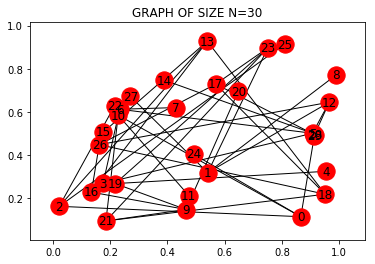

ORIGINAL GRAPH:


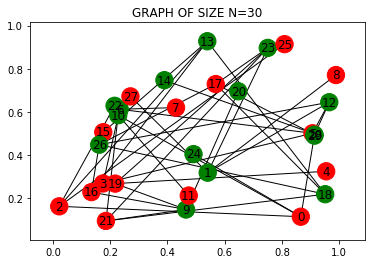

In [74]:
inv_correl=np.linalg.inv(correl_matrix)
inv_correl_vector=Correlation_order(inv_correl,nodes)
#print(inv_correl)
reco_graph = {k: [] for k in range(nodes)}

sensitivity=0.07


for couple in inv_correl_vector:
    if abs(couple[2]) >sensitivity:
        if len(reco_graph[couple[0]])<4 and len(reco_graph[couple[1]])<4:
            reco_graph[couple[0]].append(couple[1])
            reco_graph[couple[1]].append(couple[0])
print("RECONSTRUCTED GRAPH:")
draw_graph(reco_graph,position)
print("ORIGINAL GRAPH:")
draw_graph_ising(graph,position)

Infered couplings


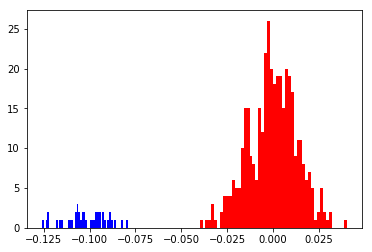

Connected correlations


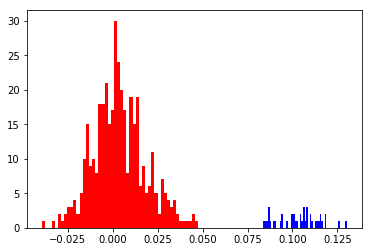

In [77]:
y_inv_good=[]
y_inv_fake=[]
y_good=[]
y_fake=[]
for couple in inv_correl_vector:
        if(Are_they_connected(graph,couple[0],couple[1])):
            y_inv_good.append(couple[2])
        else:
            y_inv_fake.append(couple[2])
        
for couple in correl_vector:
        if(Are_they_connected(graph,couple[0],couple[1])):
            y_good.append(couple[2])
        else:
            y_fake.append(couple[2])
print("Infered couplings")

plt.hist(y_inv_fake,bins=50,color='r')
plt.hist(y_inv_good,bins=50,color='b')
plt.show()
print("Connected correlations")
plt.hist(y_fake,bins=50,color='r')
plt.hist(y_good,bins=50,color='b')
plt.show()

On the histograms we can see clear separation between infered couplings and connected correlations. But this behaviour is highly dependent on the number of samples we have. The histograms above correspond to $M=5000$, this is enough to infer the graph. If the number of samples is not enough, we will see the overlap between the blue and the red histograms. In that case we won't be able to discriminate well between the right and wrong connections, and as a result to reconstruct the graph.   